In [1]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from sklearn  import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as s
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
d=p.read_csv("DOGE-USD.csv")

In [3]:
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [4]:
d.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN
1760,2022-09-04,0.062682,0.062744,0.062667,0.062696,0.062696,297513408.0


In [5]:
d.shape

(1761, 7)

In [6]:
d.size

12327

In [7]:
d.count()

Date         1761
Open         1760
High         1760
Low          1760
Close        1760
Adj Close    1760
Volume       1760
dtype: int64

In [8]:
d.value_counts()

Date        Open      High      Low       Close     Adj Close  Volume      
2017-11-09  0.001207  0.001415  0.001181  0.001415  0.001415   6.259550e+06    1
2021-01-21  0.009062  0.009089  0.008061  0.008166  0.008166   2.154198e+08    1
2021-02-01  0.037054  0.043250  0.033367  0.034875  0.034875   6.319224e+09    1
2021-01-31  0.028191  0.045289  0.027102  0.037196  0.037196   8.548998e+09    1
2021-01-30  0.046803  0.049901  0.022488  0.028176  0.028176   8.735577e+09    1
                                                                              ..
2019-06-15  0.003135  0.003204  0.003097  0.003157  0.003157   6.343642e+07    1
2019-06-14  0.003075  0.003142  0.003037  0.003124  0.003124   5.925285e+07    1
2019-06-13  0.003063  0.003168  0.003030  0.003074  0.003074   6.697369e+07    1
2019-06-12  0.003061  0.003094  0.003019  0.003067  0.003067   6.954317e+07    1
2022-09-04  0.062682  0.062744  0.062667  0.062696  0.062696   2.975134e+08    1
Length: 1760, dtype: int64

In [9]:
d.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [10]:
d.isna().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [11]:
d.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [13]:
d.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [14]:
d.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1755,2022-08-30,0.063899,0.064408,0.060550,0.061525,0.061525,328934727.0
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0


In [15]:
d['Date']=p.to_datetime(d['Date'],infer_datetime_format=True)
d.set_index('Date', inplace=True)
d.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [16]:
plt.figure(figsize=(12,12))
x=d.groupby('Date')['Close'].mean()

<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Date vs Volume')

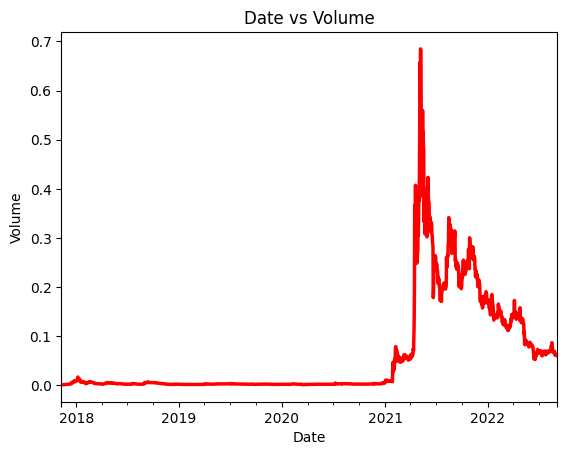

In [17]:
x.plot(linewidth=2.5, color='r')
plt.xlabel('Date')
plt.ylabel("Volume")
plt.title("Date vs Volume")

In [18]:
d["gap"] = (d["High"] - d["Low"]) * d["Volume"]


In [19]:
d["y"] = d["High"] / d["Volume"]

In [20]:
d["z"] = d["Low"] / d["Volume"]

In [21]:
d["a"] = d["High"] / d["Low"]

In [22]:
d["b"] = (d["High"] / d["Low"]) * d["Volume"]

In [23]:
abs(d.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [24]:
d2 = d.tail(30)
t1 = d2[:11]
t2 = d2[-19:] 
print(t1.shape, t2.shape)

(11, 11) (19, 11)


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=t1["Close"], exog=t1.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters f

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  95.346
Date:                Thu, 24 Aug 2023   AIC                           -162.692
Time:                        23:20:21   BIC                           -158.456
Sample:                    08-06-2022   HQIC                          -167.339
                         - 08-16-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open        6.741e-08   3.27e-18   2.06e+10      0.000    6.74e-08    6.74e-08
High       -9.471e-07   3.24e-18  -2.92e+11      0.000   -9.47e-07   -9.47e-07
Low         9.066e-07   1.77e-17   5.12e+10      0.0

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
